In [1]:
from csp import *
from notebook import psource, plot_NQueens
%matplotlib inline

# Hide warnings in the matplotlib sections
import warnings
warnings.filterwarnings("ignore")

In [2]:
neighbors = parse_neighbors('A:B; B:')
domains = {'A': [0, 1, 2, 3, 4], 'B': [0, 1, 2, 3, 4]}
constraints = lambda X, x, Y, y: x % 2 == 0 and (x + y) == 4 and y % 2 !=0
removals = []

In [3]:
csp = CSP(variables=None, domains=domains, neighbors=neighbors, constraints=constraints)

In [4]:
AC3(csp, removals=removals)

(False, 25)

In [5]:
constraints = lambda X, x, Y, y: (x % 2) == 0 and (x + y) == 4
removals = []
csp = CSP(variables=None, domains=domains, neighbors=neighbors, constraints=constraints)

In [6]:
AC3(csp, removals=removals)

(True, 31)

## Sudoku

In [7]:
sudoku = Sudoku(easy1)
sudoku.display(sudoku.infer_assignment())

. . 3 | . 2 . | 6 . .
9 . . | 3 . 5 | . . 1
. . 1 | 8 . 6 | 4 . .
------+-------+------
. . 8 | 1 . 2 | 9 . .
7 . . | . . . | . . 8
. . 6 | 7 . 8 | 2 . .
------+-------+------
. . 2 | 6 . 9 | 5 . .
8 . . | 2 . 3 | . . 9
. . 5 | . 1 . | 3 . .


### First, Check CSP with AC3

In [8]:
%time results, checks = AC3(sudoku, arc_heuristic=no_arc_heuristic)
print(f"Check Results:{results}")
print(f"AC3 needs {checks} consistency-checks")

CPU times: user 8.26 ms, sys: 81 µs, total: 8.34 ms
Wall time: 8.3 ms
Check Results:True
AC3 needs 11322 consistency-checks


In [9]:
sudoku = Sudoku(easy1)
sudoku.display(sudoku.infer_assignment())
%time backtracking_search(sudoku, select_unassigned_variable=mrv, inference=forward_checking)
sudoku.display(sudoku.infer_assignment())

. . 3 | . 2 . | 6 . .
9 . . | 3 . 5 | . . 1
. . 1 | 8 . 6 | 4 . .
------+-------+------
. . 8 | 1 . 2 | 9 . .
7 . . | . . . | . . 8
. . 6 | 7 . 8 | 2 . .
------+-------+------
. . 2 | 6 . 9 | 5 . .
8 . . | 2 . 3 | . . 9
. . 5 | . 1 . | 3 . .
CPU times: user 6.89 ms, sys: 166 µs, total: 7.05 ms
Wall time: 6.9 ms
4 8 3 | 9 2 1 | 6 5 7
9 6 7 | 3 4 5 | 8 2 1
2 5 1 | 8 7 6 | 4 9 3
------+-------+------
5 4 8 | 1 3 2 | 9 7 6
7 2 9 | 5 6 4 | 1 3 8
1 3 6 | 7 9 8 | 2 4 5
------+-------+------
3 7 2 | 6 8 9 | 5 1 4
8 1 4 | 2 5 3 | 7 6 9
6 9 5 | 4 1 7 | 3 8 2


In [10]:
sudoku = Sudoku(harder1)
sudoku.display(sudoku.infer_assignment())

4 1 7 | 3 6 9 | 8 . 5
. 3 . | . . . | . . .
. . . | 7 . . | . . .
------+-------+------
. 2 . | . . . | . 6 .
. . . | . 8 . | 4 . .
. . . | . 1 . | . . .
------+-------+------
. . . | 6 . 3 | . 7 .
5 . . | 2 . . | . . .
1 . 4 | . . . | . . .


In [11]:
%time results, checks = AC3(sudoku, arc_heuristic=no_arc_heuristic)
print(f"Check Results:{results}")
print(f"AC3 needs {checks} consistency-checks")

CPU times: user 8.79 ms, sys: 0 ns, total: 8.79 ms
Wall time: 9.04 ms
Check Results:True
AC3 needs 12837 consistency-checks


In [12]:
sudoku = Sudoku(harder1)
sudoku.display(sudoku.infer_assignment())
%time backtracking_search(sudoku, select_unassigned_variable=mrv, inference=forward_checking)
sudoku.display(sudoku.infer_assignment())

4 1 7 | 3 6 9 | 8 . 5
. 3 . | . . . | . . .
. . . | 7 . . | . . .
------+-------+------
. 2 . | . . . | . 6 .
. . . | . 8 . | 4 . .
. . . | . 1 . | . . .
------+-------+------
. . . | 6 . 3 | . 7 .
5 . . | 2 . . | . . .
1 . 4 | . . . | . . .
CPU times: user 7.44 ms, sys: 3.87 ms, total: 11.3 ms
Wall time: 11.2 ms
4 1 7 | 3 6 9 | 8 2 5
6 3 2 | 1 5 8 | 9 4 7
9 5 8 | 7 2 4 | 3 1 6
------+-------+------
8 2 5 | 4 3 7 | 1 6 9
7 9 1 | 5 8 6 | 4 3 2
3 4 6 | 9 1 2 | 7 5 8
------+-------+------
2 8 9 | 6 4 3 | 5 7 1
5 7 3 | 2 9 1 | 6 8 4
1 6 4 | 8 7 5 | 2 9 3


## 8-queens

In [13]:
eight_queens = NQueensCSP(8)

In [14]:
%time results, checks = AC3(eight_queens, arc_heuristic=no_arc_heuristic)
print(f"Check Results:{results}")
print(f"AC3 needs {checks} consistency-checks")

CPU times: user 760 µs, sys: 0 ns, total: 760 µs
Wall time: 766 µs
Check Results:True
AC3 needs 666 consistency-checks


{0: 2, 1: 4, 2: 1, 3: 7, 4: 0, 5: 6, 6: 3, 7: 5}
Figure(504x504)


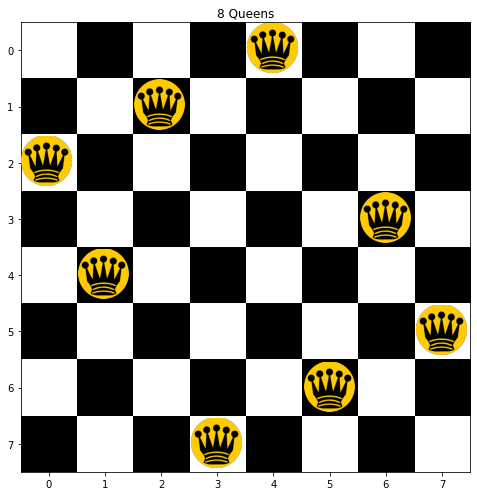

In [15]:
solution = min_conflicts(eight_queens)
print(solution)
plot_NQueens(solution)

In [16]:
import copy
class InstruCSP(CSP):
    
    def __init__(self, variables, domains, neighbors, constraints):
        super().__init__(variables, domains, neighbors, constraints)
        self.assignment_history = []
        
    def assign(self, var, val, assignment):
        super().assign(var,val, assignment)
        self.assignment_history.append(copy.deepcopy(assignment))
    
    def unassign(self, var, assignment):
        super().unassign(var,assignment)
        self.assignment_history.append(copy.deepcopy(assignment))

In [17]:
def make_instru(csp):
    return InstruCSP(csp.variables, csp.domains, csp.neighbors, csp.constraints)

Figure(504x504)


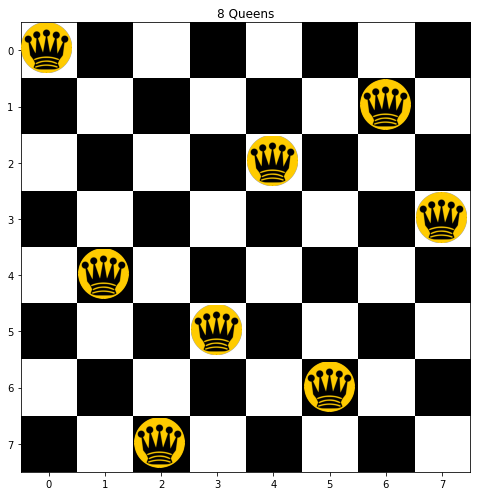

In [18]:
eight_queens = NQueensCSP(8)
backtracking_instru_queen = make_instru(eight_queens)
result = backtracking_search(backtracking_instru_queen)
plot_NQueens(result)

In [19]:
from notebook import plot_NQueens
eight_queens = NQueensCSP(8)
result = tree_csp_solver(eight_queens)
print(result)
# plot_NQueens(result)

None


## Graph Coloring

In [20]:
s = UniversalDict(['R','G','B'])
s[5]

['R', 'G', 'B']

In [21]:
australia_csp, usa_csp, france_csp

(<csp.CSP at 0x7faee0061b50>,
 <csp.CSP at 0x7fae79268090>)

In [22]:
%time results, checks = AC3(australia_csp, arc_heuristic=no_arc_heuristic)
print(f"Check Results:{results}")
print(f"AC3 needs {checks} consistency-checks")

CPU times: user 41 µs, sys: 13 µs, total: 54 µs
Wall time: 58.4 µs
Check Results:True
AC3 needs 72 consistency-checks


In [23]:
%time results, checks = AC3(usa_csp, arc_heuristic=no_arc_heuristic)
print(f"Check Results:{results}")
print(f"AC3 needs {checks} consistency-checks")

CPU times: user 299 µs, sys: 96 µs, total: 395 µs
Wall time: 399 µs
Check Results:True
AC3 needs 1070 consistency-checks


In [24]:
%time results, checks = AC3(france_csp, arc_heuristic=no_arc_heuristic)
print(f"Check Results:{results}")
print(f"AC3 needs {checks} consistency-checks")

CPU times: user 210 µs, sys: 67 µs, total: 277 µs
Wall time: 282 µs
Check Results:True
AC3 needs 430 consistency-checks


In [25]:
solution = min_conflicts(australia_csp)
print(solution)

{'SA': 'G', 'WA': 'R', 'NT': 'B', 'Q': 'R', 'NSW': 'B', 'V': 'R'}


In [26]:
import networkx as nx
def draw_graph(csp, solution, node_size=1000):
    graph = csp.neighbors
    G=nx.Graph(graph)
    pos = nx.spring_layout(G,k=0.15)
    colors = [solution[node] for node in G.nodes]
    colors_dict = {'G':'Green', 'B':'Blue', 'R':'Red', 'Y':'Yellow'}
    colors = [colors_dict[c] for c in colors]
    nx.draw(G, pos, node_color=colors, node_size=node_size, with_labels=True)
    return None

{'SA': 'B', 'WA': 'G', 'NT': 'R', 'Q': 'G', 'NSW': 'R', 'V': 'G'}


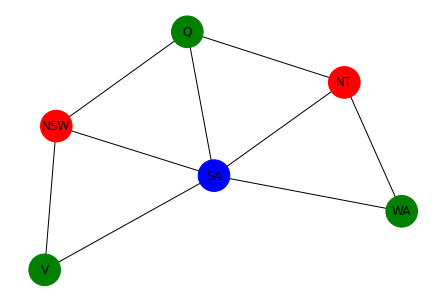

In [27]:
solution = min_conflicts(australia_csp)
print(solution)
draw_graph(australia_csp, solution)

{'SA': 'R', 'WA': 'G', 'NT': 'B', 'Q': 'G', 'NSW': 'B', 'V': 'G'}


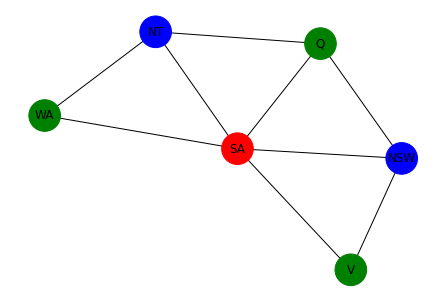

In [28]:
solution = backtracking_search(australia_csp)
print(solution)
draw_graph(australia_csp, solution)

{'SA': 'R', 'WA': 'G', 'NT': 'B', 'Q': 'G', 'NSW': 'B', 'V': 'G'}


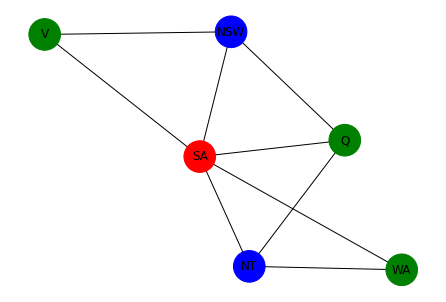

In [29]:
solution = tree_csp_solver(australia_csp)
print(solution)
draw_graph(australia_csp, solution)

{'WA': 'Y', 'OR': 'R', 'ID': 'G', 'NV': 'Y', 'CA': 'G', 'AZ': 'R', 'UT': 'B', 'MT': 'Y', 'WY': 'R', 'CO': 'Y', 'ND': 'R', 'SD': 'B', 'NE': 'G', 'KA': 'B', 'OK': 'R', 'NM': 'G', 'TX': 'B', 'MN': 'Y', 'IA': 'R', 'MO': 'Y', 'AR': 'G', 'LA': 'R', 'WI': 'G', 'IL': 'B', 'KY': 'R', 'TN': 'B', 'MS': 'Y', 'MI': 'R', 'IN': 'Y', 'OH': 'B', 'AL': 'R', 'GA': 'Y', 'FL': 'B', 'PA': 'G', 'WV': 'Y', 'VA': 'G', 'NC': 'R', 'SC': 'B', 'NY': 'B', 'NJ': 'R', 'DE': 'Y', 'MD': 'B', 'DC': 'Y', 'VT': 'G', 'MA': 'Y', 'CT': 'R', 'NH': 'R', 'RI': 'B', 'ME': 'G'}


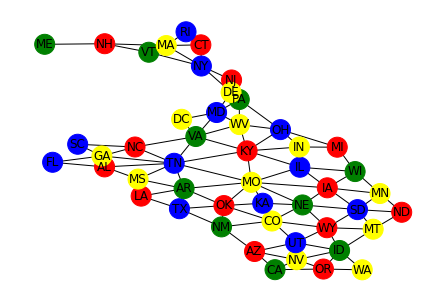

In [30]:
solution = min_conflicts(usa_csp)
print(solution)
draw_graph(usa_csp, solution, node_size=400)

{'WA': 'R', 'OR': 'G', 'ID': 'B', 'NV': 'R', 'CA': 'B', 'AZ': 'G', 'UT': 'Y', 'MT': 'R', 'WY': 'G', 'CO': 'R', 'ND': 'G', 'SD': 'B', 'NE': 'Y', 'KA': 'G', 'OK': 'B', 'NM': 'Y', 'TX': 'R', 'MN': 'R', 'IA': 'G', 'MO': 'R', 'AR': 'G', 'LA': 'B', 'WI': 'B', 'IL': 'Y', 'KY': 'G', 'TN': 'B', 'MS': 'R', 'MI': 'R', 'IN': 'B', 'OH': 'Y', 'AL': 'G', 'GA': 'R', 'FL': 'B', 'PA': 'R', 'WV': 'B', 'VA': 'R', 'NC': 'G', 'SC': 'B', 'NY': 'G', 'NJ': 'B', 'DE': 'G', 'MD': 'Y', 'DC': 'G', 'VT': 'R', 'MA': 'B', 'CT': 'R', 'NH': 'G', 'RI': 'G', 'ME': 'R'}


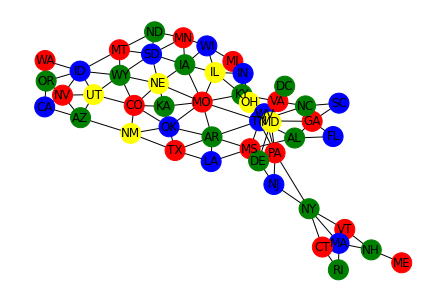

In [31]:
solution = backtracking_search(usa_csp)
print(solution)
draw_graph(usa_csp, solution, node_size=400)

{'WA': 'R', 'OR': 'G', 'ID': 'B', 'NV': 'R', 'CA': 'B', 'AZ': 'G', 'UT': 'Y', 'WY': 'G', 'MT': 'R', 'ND': 'G', 'MN': 'R', 'SD': 'B', 'IA': 'G', 'NE': 'Y', 'CO': 'R', 'KA': 'G', 'MO': 'R', 'OK': 'B', 'NM': 'Y', 'TX': 'R', 'AR': 'G', 'MS': 'R', 'TN': 'B', 'AL': 'G', 'GA': 'R', 'FL': 'B', 'NC': 'G', 'SC': 'B', 'VA': 'R', 'KY': 'G', 'IL': 'Y', 'WI': 'B', 'MI': 'R', 'OH': 'Y', 'PA': 'R', 'NY': 'G', 'NJ': 'B', 'DE': 'G', 'MD': 'Y', 'DC': 'G', 'WV': 'B', 'VT': 'R', 'NH': 'G', 'ME': 'R', 'MA': 'B', 'RI': 'G', 'CT': 'R', 'IN': 'B', 'LA': 'B'}


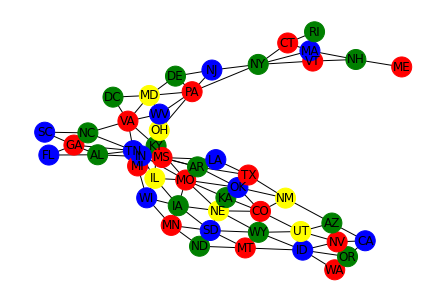

In [32]:
solution = tree_csp_solver(usa_csp)
print(solution)
draw_graph(usa_csp, solution, node_size=400)

{'AL': 'B', 'LO': 'Y', 'FC': 'R', 'AQ': 'G', 'MP': 'B', 'LI': 'Y', 'PC': 'R', 'AU': 'G', 'CE': 'B', 'BO': 'Y', 'RA': 'B', 'LR': 'R', 'IF': 'R', 'CA': 'G', 'BR': 'B', 'NB': 'R', 'PL': 'Y', 'PI': 'Y', 'NH': 'G', 'PA': 'G', 'NO': 'R'}


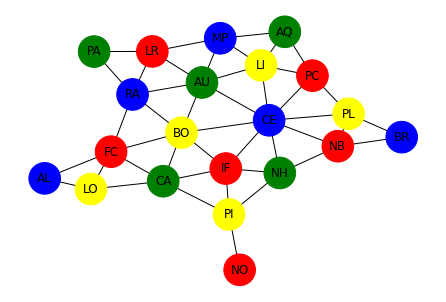

In [33]:
solution = min_conflicts(france_csp)
print(solution)
draw_graph(france_csp, solution)

{'AL': 'R', 'LO': 'G', 'FC': 'B', 'AQ': 'R', 'MP': 'G', 'LI': 'B', 'PC': 'G', 'AU': 'R', 'CE': 'Y', 'BO': 'G', 'RA': 'Y', 'LR': 'B', 'IF': 'R', 'CA': 'Y', 'BR': 'R', 'NB': 'G', 'PL': 'B', 'PI': 'G', 'NH': 'B', 'PA': 'R', 'NO': 'R'}


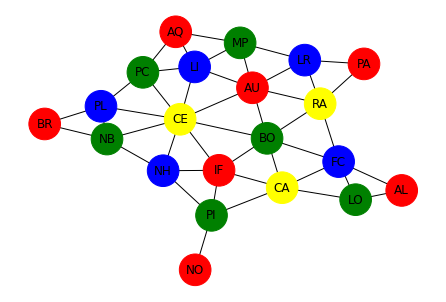

In [34]:
solution = backtracking_search(france_csp)
print(solution)
draw_graph(france_csp, solution)

{'AL': 'R', 'LO': 'G', 'CA': 'Y', 'BO': 'G', 'AU': 'R', 'LI': 'B', 'AQ': 'R', 'PC': 'G', 'CE': 'Y', 'PL': 'B', 'BR': 'R', 'NB': 'G', 'NH': 'B', 'IF': 'R', 'PI': 'G', 'NO': 'R', 'MP': 'G', 'LR': 'B', 'RA': 'Y', 'PA': 'R', 'FC': 'B'}


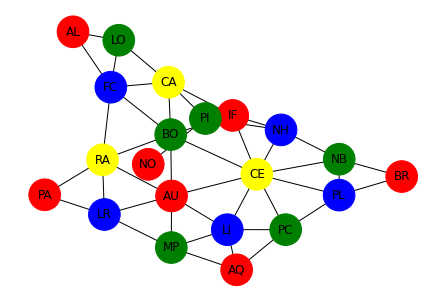

In [35]:
solution = tree_csp_solver(france_csp)
print(solution)
draw_graph(france_csp, solution)